In [1]:
# modules
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
import math
from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')

$$
\begin{align} 
\ln(\textit{inc}_{2020}) &= \ln(\textit{inc}_0) + \ln(\varepsilon_{2020}) \\
\ln(\textit{inc}_{t})    &= (1-\rho) [\ln(\textit{inc}_0) + g(t-2020)] 
                         + \rho \ln(\textit{inc}_{t-1}) + \ln(\varepsilon_{t}) \ \
                          \forall 2021 \leq t \leq 2059
\end{align} 
$$

In [2]:
# (a)
# hyper-parameters setting
sd = 0.13
mu = 0
rho = 0.4
g = 0.025
ln_inc0 = math.log(80000)
num_simu = 10000
num_years = 40

# generate the log of errors from N(mean=0, sd=0.13) 
ln_err = []
for i in range(num_simu): # loop for observations
    ln_err.append(random.normal(mu, sd, num_years)) # append 40 log of errors into ln_err
ln_err = np.stack(ln_err) # list to np.array

ln_inct = ln_err # just copy xD so we don't need to use np.blablabla... to ini. 
ln_inct[:,0] = ln_inc0 + ln_err[:,0] # generate the log of incomes in 2020 from log(inc0)
for i in range(0,num_years):
    t = 2020 + i # calculate the t with the reference year
    if i !=0:
        ln_inct[:,i] += (1-rho)*(ln_inc0 + g*(t-2020)) + rho*ln_inct[:,i-1]

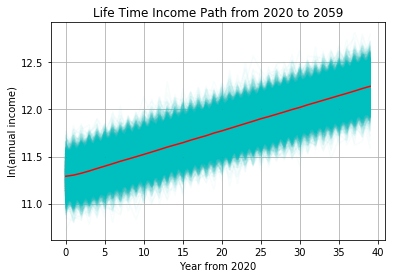

In [3]:
# make a plot :) 
for i in range(num_simu):
    plt.plot(ln_inct[i,], 'c' ,alpha=0.03)
plt.plot(np.mean(ln_inct,axis=0),'r')
plt.title('Life Time Income Path from 2020 to 2059')
plt.xlabel('Year from 2020'); plt.ylabel('ln(annual income)')
plt.grid()
plt.show()


4.36% of the class will earn more than $100,000.
15.38% of the class will earn less than $70,000.
The p-value of Shapiro-Wilk test is extremely small: 0.000000000000000000000002536331.


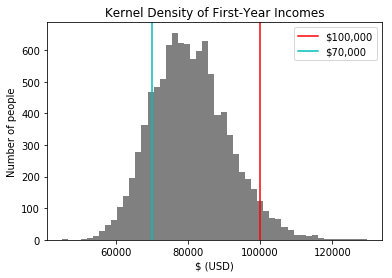

In [4]:
# (b)
# obtain the exponential of the first-year incomes from ln_inct
first_year_inc = np.exp(ln_inct[:,0]) 
higher_line = 100000
lower_line = 70000

# plot setup
plt.hist(first_year_inc, bins=50,color='gray')
plt.axvline(x=higher_line,color='r')
plt.axvline(x=lower_line,color='c')
plt.title('Kernel Density of First-Year Incomes')
plt.xlabel('$ (USD)'); plt.ylabel('Number of people')
plt.gca().legend(('$100,000','$70,000'))

# percent of your class will earn more than $100,000 (red)
percent_higher = 100*sum(first_year_inc > higher_line)/num_simu
print('%.2f%% of the class will earn more than $100,000.'
      %(percent_higher))

# percent of the class will earn less than $70,000 (cyan)
percent_lower = 100*sum(first_year_inc < lower_line)/num_simu
print('%.2f%% of the class will earn less than $70,000.'
      %(percent_lower) )

print('The p-value of Shapiro-Wilk test is extremely small: %.30lf.' %shapiro(first_year_inc)[1])
# Under 95% confidence level, with the significant p-value from Shapiro-Wilk test: 
# we tend to reject the null hypothesis that the first-year 
# incomes are not normally distributed; it is a right-skewed distribution.

16.62% of the simulations are able to pay off the loan in 10 years.


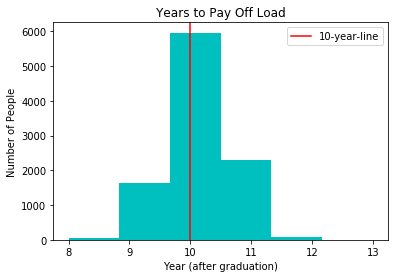

In [5]:
# (c)
# initialization
loan = np.full([10000] , 95000)
indicator = np.ones([10000])

# compute the years (after graduation) that one will pay off her loan : D 
ten_perc = 0.1*np.exp(ln_inct)
for i in range(num_simu):
    for j in range(num_years):
        loan[i] = loan[i] - ten_perc[i,j]
        if loan[i] <= 0: 
            indicator[i] = j
            break

# plot setup
plt.hist(indicator, bins=len(np.unique(indicator)), color='c')
plt.title('Years to Pay Off Load')
plt.xlabel('Year (after graduation)'); plt.ylabel('Number of People')
yr = 10
plt.axvline(x=yr,color='r')
plt.gca().legend(('10-year-line','_nolegend_'))
percent_before_10y = 100*sum(indicator<yr)/len(indicator)
print('%.2f%% of the simulations are able to pay off the loan in 10 years.'
     %(percent_before_10y))